
# K-Means Clustering Tutorial

## Introduction
K-means clustering is a popular unsupervised machine learning algorithm. It's used for grouping data into clusters based on feature similarity. The 'K' in k-means represents the number of clusters.



## Algorithm Explanation
The k-means algorithm partitions a set of \( N \) data points into \( K \) clusters. Each point belongs to the cluster with the nearest mean. The algorithm involves the following steps:

1. **Initialization**: Choose \( K \) initial centroids (cluster centers).
2. **Assignment**: Assign each data point to the nearest centroid.
3. **Update**: Recompute the centroids as the mean of all points in the cluster.
4. **Repeat**: Repeat steps 2 and 3 until convergence (when assignments no longer change).

![Alt text](kmeans_iterations.gif)

### Mathematical Background.

## Objective

- The goal is to divide $M$ data points into $k$ clusters.
- Minimize the within-cluster sum of squares (WCSS).

## Notation

- $X = \{x_1, x_2, \ldots, x_M\}$: Set of data points.
- $C = \{c_1, c_2, \ldots, c_k\}$: Set of centroids for the clusters.

## Algorithm Steps

1. **Initialization**: 
   - Select $k$ initial centroids randomly or using a heuristic.

2. **Assignment Step**: 
   - Assign each data point $x_i$ to the nearest centroid.
   - $S(i) = \text{argmin}_j \|x_i - c_j\|^2$
   - $S(i)$ is the index of the nearest centroid to $x_i$.

3. **Update Step**: 
   - Update the centroids to the mean of all points assigned to them.
   - $c_j = \frac{1}{|S_j|} \sum_{x_i \in S_j} x_i$
   - $S_j$ is the set of points assigned to centroid $c_j$.

4. **Iterate**:
   - Repeat until centroids stabilize or a max number of iterations is reached.
   - WCSS: $\sum_{j=1}^{k} \sum_{x
with different shapes, sizes, or high-dimensional data.


## Convergence

- The algorithm converges but may reach a local minimum.
- The initial selection of centroids is crucial.
- Often run multiple times for better solutions .

## Complexity

- Generally, $O(n \cdot k \cdot d \cdot i)$, where:
  - $n$ is the number of data points,
  - $k$ is the number of clusters,
  - $d$ is the dimensionality of data,
  - $i$ is the number of iterations.

## Considerations

- **Choosing $k$**: Critical and not determined by the algorithm.
- **Scaling**: Often necessary to scale data before applying k-means.


## Variants

- **k-means++**: Offers smarter initialization of centroids.

K-means is effective for spherical clusters but can struggle with different shapes, sizes, or high-dimensional data.


## Implementation from Scratch
Let's implement the k-means algorithm in Python from scratch.


In [1]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6]])  # Shape (2, 3)
b = np.array([1, 2, 3])               # Shape (3,)
c =  b[np.newaxis, :]
# Reshape 'b' and broadcast it with 'A'
result = A + b[np.newaxis, :]  # 'b' is reshaped to (1, 3)

print(c)


[[1 2 3]]


In [2]:

import numpy as np

def kmeans(X, K, max_iters=100):
    # Step 1: Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]

    for _ in range(max_iters):
        # Step 2: Assign points to the nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_centroid = np.argmin(distances, axis=0)

        # Step 3: Update centroids
        new_centroids = np.array([X[closest_centroid == k].mean(axis=0) for k in range(K)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return closest_centroid, centroids



## Dataset Generation
We'll generate a synthetic dataset to apply our k-means implementation.


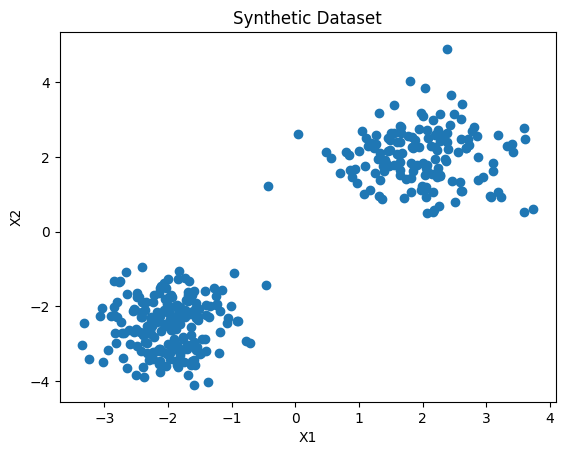

In [3]:

import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.concatenate([np.random.randn(150, 2) * 0.75 + np.array([2, 2]),
                    np.random.randn(100, 2) * 0.5 - np.array([2, 2]),
                    np.random.randn(100, 2) * 0.5 + np.array([-2, -3])])

# Plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.title('Synthetic Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()



## Visualization
We'll visualize the results of our k-means clustering.


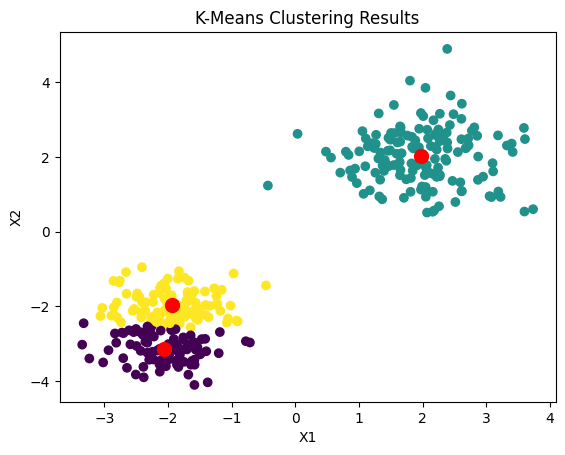

In [4]:

# Apply k-means
K = 3
labels, centroids = kmeans(X, K)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red') # Centroids
plt.title('K-Means Clustering Results')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()



## Elbow Method
The elbow method helps to determine the optimal number of clusters. We plot the variance against the number of clusters and look for an 'elbow' where the rate of decrease sharply changes.


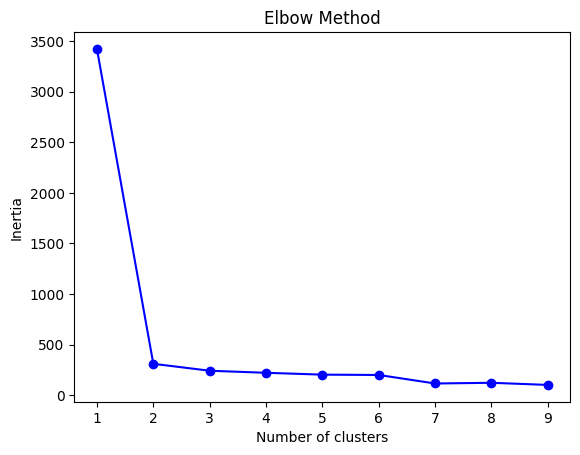

In [5]:

def compute_inertia(X, centroids, labels):
    inertia = 0
    for i, centroid in enumerate(centroids):
        inertia += ((X[labels == i] - centroid) ** 2).sum()
    return inertia

inertias = []
for k in range(1, 10):
    labels, centroids = kmeans(X, k)
    inertia = compute_inertia(X, centroids, labels)
    inertias.append(inertia)

plt.plot(range(1, 10), inertias, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



## Automatic Cluster Number Selection
We'll use the differences in the elbow graph to automatically select the number of clusters.


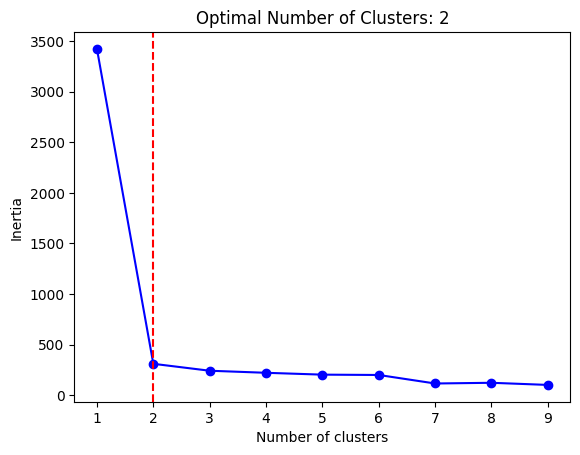

In [6]:

# Calculate the differences in inertia
diffs = np.diff(inertias)
# Find the elbow point
optimal_k = np.argmin(diffs[diffs > 0]) + 2

plt.plot(range(1, 10), inertias, 'bo-')
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.title('Optimal Number of Clusters: {}'.format(optimal_k))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



## Conclusion
This tutorial demonstrated how to implement and apply k-means clustering from scratch. The elbow method, along with an automatic approach to select the number of clusters, provides a practical way to apply k-means in various scenarios.



## Limitations of K-Means: Non-Convex Shapes
K-means works well with globular (spherical) cluster shapes. However, it struggles with non-convex shapes like half-moons due to its reliance on Euclidean distance.


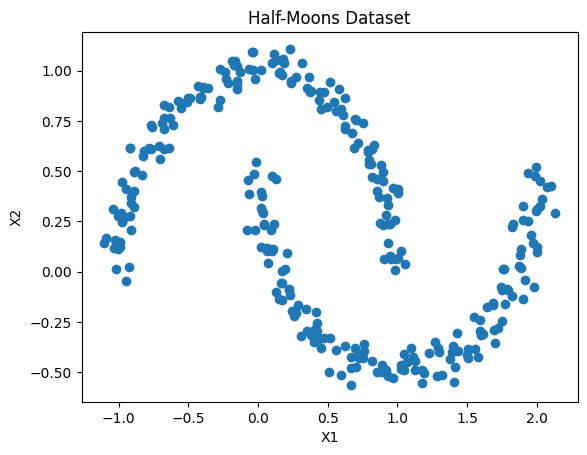

In [7]:

from sklearn.datasets import make_moons

# Generate half-moons data
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)

# Visualize the data
plt.scatter(X_moons[:, 0], X_moons[:, 1])
plt.title('Half-Moons Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


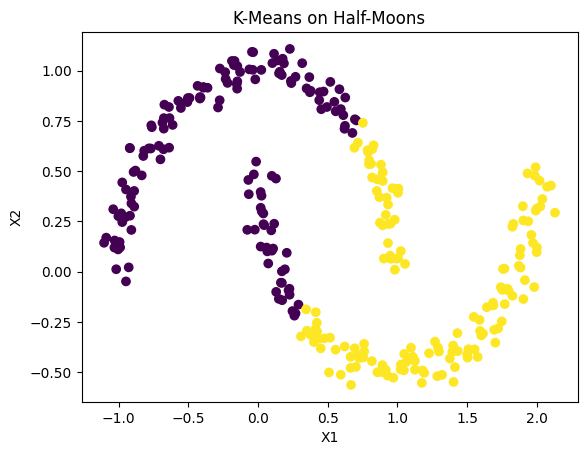

In [8]:

# Apply k-means to half-moons dataset
labels_moons, _ = kmeans(X_moons, K=2)

# Visualization
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap='viridis')
plt.title('K-Means on Half-Moons')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()



As seen in the visualization, k-means is unable to accurately capture the structure of the half-moons dataset. This limitation highlights the importance of understanding the data distribution and the characteristics of the chosen clustering algorithm.


### Code for animated gif generation

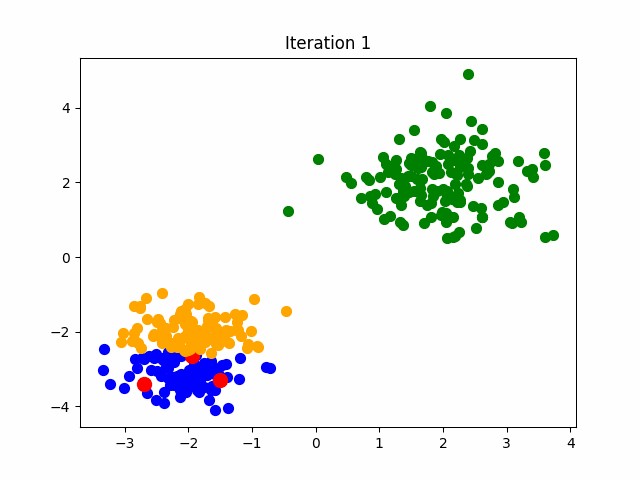

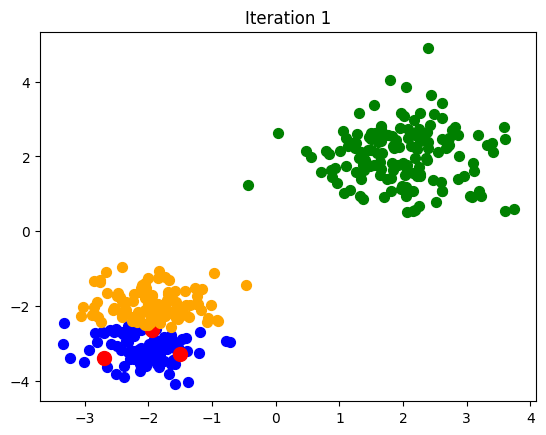

In [9]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image
import numpy as np

def kmeans(X, K, max_iters=10):
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]
    history_centroids = [centroids]
    
    for _ in range(max_iters):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_centroid = np.argmin(distances, axis=0)
        centroids = np.array([X[closest_centroid == k].mean(axis=0) for k in range(K)])
        history_centroids.append(centroids)
    
    return closest_centroid, centroids, history_centroids

# Generate synthetic data
np.random.seed(42)
X = np.concatenate([np.random.randn(150, 2) * 0.75 + np.array([2, 2]),
                    np.random.randn(100, 2) * 0.5 - np.array([2, 2]),
                    np.random.randn(100, 2) * 0.5 + np.array([-2, -3])])

# Apply k-means
K = 3
labels, final_centroids, history_centroids = kmeans(X, K)

# Animation
fig, ax = plt.subplots()
colors = ['blue', 'green', 'orange']

def update(frame):
    ax.clear()
    centroids = history_centroids[frame]
    for i in range(K):
        points = X[labels == i]
        ax.scatter(points[:, 0], points[:, 1], s=50, color=colors[i])
        ax.scatter(centroids[i, 0], centroids[i, 1], s=100, color='red')
    ax.set_title(f'Iteration {frame + 1}')

ani = FuncAnimation(fig, update, frames=len(history_centroids), interval=1000, repeat=False)

# Save as GIF
gif_path = 'kmeans_iterations.gif'
ani.save(gif_path, writer='pillow')
Image(filename=gif_path)

